# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd
#C:\Users\keyur\Human temperature\1520467485_dsc_human_temp\EDA_human_temperature\data

#df = pd.read_csv('data/human_body_temperature.csv')
df=pd.read_csv('human_body_temperature.csv')


In [3]:
# top 5 records
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [4]:
# No. of records
len(df)

130

In [5]:
# No.
df.tail()

,temperature,gender,heart_rate
125,96.3,M,70.0
126,97.7,M,77.0
127,98.2,F,73.0
128,97.9,M,72.0
129,98.7,F,59.0


In [6]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

### Q1 - Is the distribution of body temperatures normal?

In [7]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [8]:
mean_temp=df['temperature'].mean()

In [9]:
mean_temp

98.24923076923078

In [10]:
median_temp=df['temperature'].median()
median_temp


98.3

In [11]:
std_temp=df['temperature'].std()

In [12]:
std_temp

0.7331831580389454

In [13]:
skew_temp=df['temperature'].skew()

In [14]:
skew_temp

-0.004419131168995771

In [15]:
mode_temp=df['temperature'].mode()

In [16]:
mode_temp

0    98.0
dtype: float64

In [17]:
kurtosis_temp=df['temperature'].kurt()

In [18]:
kurtosis_temp


0.7804573950337375

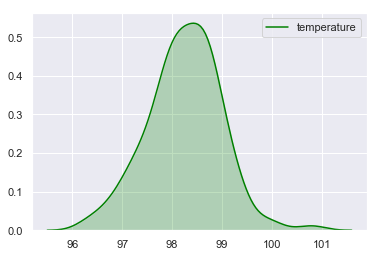

In [19]:
sns.kdeplot(df.temperature, shade=True,color='green')

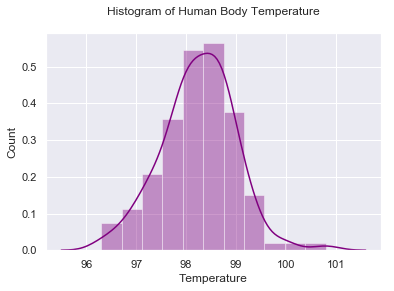

In [20]:
# Histogram has binning bias as we force the data into bins. We use bin size equal to the square root of sample size.
n_data=len(df)
n_bins=np.sqrt(n_data)
n_bins=int(n_bins)
ax = sns.distplot(df['temperature'],bins=n_bins,color='purple')
ax= plt.ylabel('Count')
ax= plt.xlabel('Temperature')
ax= plt.title('Histogram of Human Body Temperature\n')

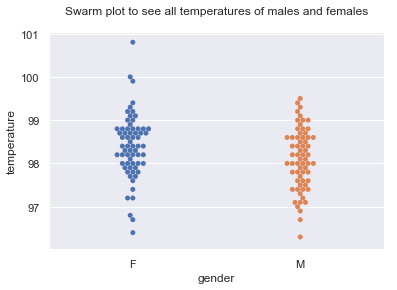

In [21]:
# To understand the distribution of temperature , we also need to understand the distribution of gender data
_= sns.swarmplot(x='gender',y='temperature',data=df)
_= plt.title('Swarm plot to see all temperatures of males and females\n')
plt.show()
# we can there is more variation in Female temperature than male. Also female has higher temperature range.

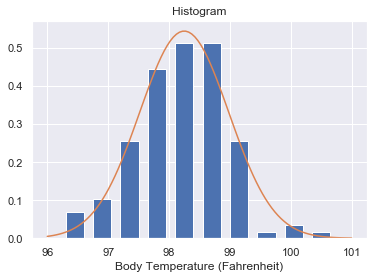

In [22]:
# Draw a histogram of body temperature and a normal distribution
plt.hist(df.temperature, width=0.3, normed=True)
plt.xlabel('Body Temperature (Fahrenheit)')
plt.title('Histogram')
xs = np.linspace(96, 101, 100)
temp_mean = df.temperature.mean()
temp_std = df.temperature.std()
pdf = stats.norm.pdf(xs, temp_mean, temp_std)
plt.plot(xs, pdf)

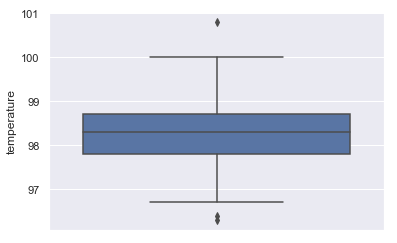

In [23]:
sns.set()
sns.boxplot(x=df['temperature'],orient='v')

In [24]:
normality_test = stats.mstats.normaltest(df['temperature']) 
print('The z-statistic of the normality test is {:1.3f} with a p-value of {:1.3f}.'.format(normality_test[0],normality_test[1]))

The z-statistic of the normality test is 2.704 with a p-value of 0.259.


In [25]:

# conduct normal test
from scipy.stats import normaltest
statistic, p_val = normaltest(df['temperature'])

print('chi-square statistic:',statistic)
print('p value =',p_val)

chi-square statistic: 2.703801433319203
p value = 0.2587479863488254


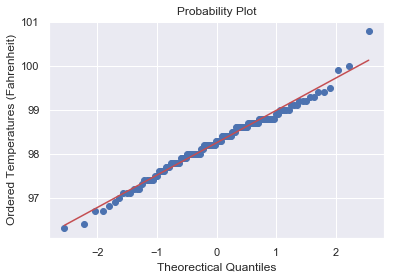

In [26]:
import pylab
stats.probplot(df.temperature, dist='norm', plot=pylab)
plt.xlabel('Theorectical Quantiles')
plt.ylabel('Ordered Temperatures (Fahrenheit)')
plt.title('Probability Plot')

In [27]:
### ecdf Function to chart ecdf

In [28]:
def ecdf(data):
    # no of data points
    n=len(data)
    
    # sorted data for x
    x=np.sort(data)
    
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

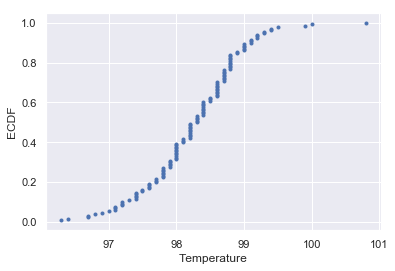

In [29]:

# EDCF chart to get some insights
# Compute ECDF for temperature: x_temp, y_temp
x_temp, y_temp = ecdf(df['temperature'])

# Generate plot
_ = plt.plot(x_temp, y_temp, marker='.', linestyle='none')

# Label the axes
_ = plt.xlabel('Temperature')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()


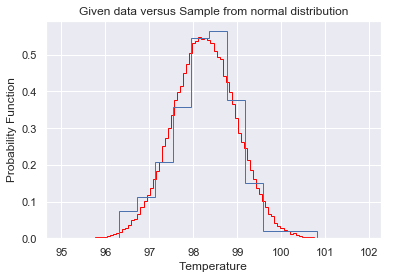

In [30]:

# Let us plot assume that the sample data is indeed from a normal distribution. We will use the sample mean and std
# to estimate the normal population parameters

mean = np.mean(df['temperature'])
std = np.std(df['temperature'])

samples = np.random.normal(mean,std,100000)

plt.hist(samples,bins=100,normed=True,histtype='step',color='red')
plt.hist(df['temperature'],bins=n_bins,histtype='step',normed=True)
plt.xlabel('Temperature')
plt.ylabel('Probability Function')
plt.title('Given data versus Sample from normal distribution')
plt.show()

#### The historgram for the given data looks to be close to normal distribution. But we should do more analysis before drawing any conclustion.

In [31]:
# samples from normal distribution with mu and sigma : samples
samples=np.random.normal(mean_temp,std_temp,size=100000)

In [32]:
# Get the CDF of the samples and of the data
x_theor,y_theor=ecdf(samples)
x,y=ecdf(df['temperature'])

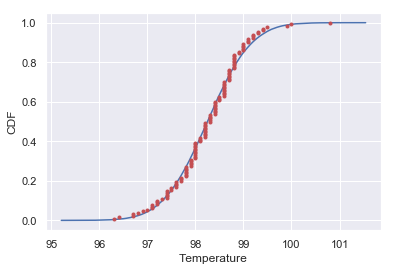

In [33]:
# plot the CDF and show the plot
_ = plt.plot(x_theor,y_theor)
_ = plt.plot(x,y,marker='.',linestyle='none',color='r')
_ = plt.xlabel('Temperature')
_ = plt.ylabel('CDF')
_ = plt.show()

In [34]:
test_stats, p_value =stats.shapiro(df.temperature)
print("Test statistic is ",test_stats)
print("P-value is",p_value)

Test statistic is  0.9865769743919373
P-value is 0.2331680953502655


In [35]:
# conduct hypothesis test
alpha = 0.05
if p_val < alpha:
    print("The null hypothesis - that the data comes from a normal distribution - can be rejected")
else:
    print("The null hypothesis - that the data comes from a normal distribution - cannot be rejected")

The null hypothesis - that the data comes from a normal distribution - cannot be rejected


####   Analysis shows that the distribution is Normal
Mean,Median and Mode are very close to each other.
Skewness and Kurtosis are approximately equal to zero and also between -1 and 1.
The kde,cdf and distribution plot  also show normal distribution

Hypothesis:

Ho= The distribution is Normal
Ha= The distribution is not Noraml

In order to check the normality, we perform the Shapiro-Wilk test to get our test statistic and p-value. Null hypothesis Ho= The distriution of body temperature is normal. Since the p-value is 0.233 which is not less than our significant value of 0.05. We fail to reject the null hypothesis that the distribution is normal.

Also from chi-square statistic, the distribution appears to be normally distributed (p-value = 0.259)

### Q-2  Is the sample size large? Are the observations independent?

In [36]:
# test CLT's 1st condition: sample size
if len(df) < 30:
    print("The sample size is too small (n < 30)")
else:
    print("The sample size is large (n > 30)")

The sample size is large (n > 30)


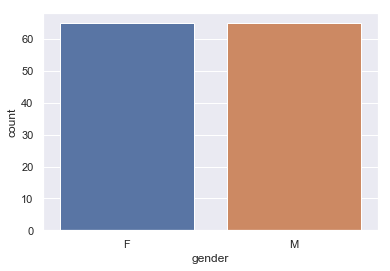

In [37]:
sns.countplot(df['gender'])


The cumulative density function for the given data is very close to normally distributed data. This tells strongly that the Human Body Temperature is nomrally distributed.

The Central Limit Theorem states that the distribution of sample mean is approximately normal. The approximation can be poor if the sample size is small, but it improves with larger sample sizes.

After all the analysis we can conclude that the mean Human body temperature is nearly normally distributed. Here is the evidence:

The sample oberservations are independent. Since the population is all the humans. And our sample observations are far less that 10% of the population, we can say that they are independent.

The sample size is large: n>=30 is a good rule of thumb. Here our sample size is 130.

The sample is not strongly skewed. So we can make a guess that population is also not strongly skewed. However, we can't be 100% sure. But that's our assumption.



#### The sample size is large (n = 130), as it is greater than 30 and the observations are  independent. We can invoke the central limit theorem and say that the sample mean will be approximately a normal distribution.

### Q-3 Is the true population mean really 98.6 degrees F?

In [38]:
# bootstrap hypothesis test
# Since we dont have multiple samples and we want to draw conclusions about the population parameters, we can utilize
# bootstrap sampling. Basic method involves taking random samples from the one given sample. And finding out the 
# confidence interval for the population parameter

# select a random value from the given sample
sample_size = len(df['temperature'])
bs_val = np.random.choice(df['temperature'],replace=True,size=sample_size)
np.mean(bs_val)

98.24307692307691

In [39]:
bs_val

array([ 99. ,  98.2,  99.3,  97.9,  98.4,  98. ,  97.8,  96.3,  99.2,
        98. ,  97.9,  97.9,  96.7,  98.6,  97.3,  97.7,  98.6,  98.6,
        97.1,  98.3,  97.7,  97.6,  97.6,  98.2,  99.9,  98.2,  98.4,
        97.9,  96.9,  98.4,  98.3,  98. ,  98.8,  96.3,  96.7,  96.8,
        98. ,  97.7,  98.1,  98.4,  98.2,  98.4,  97.4,  98. ,  98.7,
        98. ,  99. ,  97.8,  99.4,  97.4,  98. ,  98.7,  97.5,  98.2,
        98. ,  98.4,  98.4, 100. ,  99.2,  98.4,  98. ,  98.4,  96.7,
        98. ,  99.1,  97.8,  97.8,  98. ,  97.8,  98.4,  97.7,  98.7,
        99. ,  98.8,  98.6,  97.9,  98.4,  98.2,  98.6,  98.7,  98.8,
        98.6,  98.4,  99.2,  98.8,  98.3,  98.2,  97.6,  98.8,  99.1,
        99. ,  98.2,  96.4, 100. ,  98. ,  99.3,  98.4,  99.9,  98.8,
        98.8,  98.6,  97.8,  98.6,  97.4,  97.4,  97.3,  97.9,  98. ,
        98.8,  98. ,  98.8,  97.7,  98.4,  98.4,  98.1,  98.6,  99. ,
        98.3,  97.6,  98.2,  98. ,  97.9,  97.9,  99.2,  99.3,  99.3,
        98.8,  97.6,

In [40]:
# bootstrap statistic function
def bs_statistic(data, func, size):
    bs_sample_stats = np.empty(size)
    for i in range(size):
        bs_val = np.random.choice(data,replace=True,size=sample_size)
        bs_sample_stats[i] = func(bs_val)
    return bs_sample_stats

In [41]:
bs_sample_stat = bs_statistic(df['temperature'],np.mean,10000)
# 95% confidence limit
np.percentile(bs_sample_stat,[2.5,97.5])

array([98.12230769, 98.37461538])

In [42]:
# 99% confidence limit
np.percentile(bs_sample_stat,[0.5,99.5])

array([98.0823    , 98.41692692])

In [43]:
 #The true population mean of 98.6 degrees F doesn't fit in the 99% confidence interval.
# Let us do further hypothesis testing to find out

# Our sample mean is 98.25. If the true population mean is 98.6 then what are the chances that we will get such
# extreme value of 98.25?

# Let us test the null hypothesis that true mean is 98.6 F.
# Shift the sample values assuming that 98.6 F is true mean. And since the sample is close to normal we can assume
# that the population std can be estimated by sample std.

sample = df['temperature']
sample_mean = np.mean(sample)
shifted_sample = sample - sample_mean + 98.6
print(shifted_sample[0:5])

0    99.650769
1    98.750769
2    98.150769
3    99.550769
4    98.350769
Name: temperature, dtype: float64


In [44]:
bs_shifted_sample_stat = bs_statistic(shifted_sample,np.mean,10000)

In [45]:
# Calculate the p value
p = np.sum(bs_shifted_sample_stat<=98.25)/len(bs_shifted_sample_stat)
p

0.0

#### The above p value of 0 strongly suggests that the population mean is not 98.6. Because it was true then the chance of getting the sample mean of 98.25 is 0.



### Frequentist Tests

Frequentist statistical testing. Statistical hypothesis test involves making a null hypothesis about our data assuming that nothing interesting is going on. The purpose of the hypothesis test is to determine whether its true given the sample data. If there is little data against the null hypothesis we accept it. Else we reject it in favor of alternate hypothesis.

Null hypotheis: The true population mean is 98.6$^{\circ}$F

        H0: μ−98.6=0

Alternative hypothesis: The true population mean is not 98.6$^{\circ}$F

        H1: μ−98.6<>0

Significance Level: 99.9% Confidence

        α=0.01


In [46]:
# To test the above Null Hypothesis we can apply T or Z tests.
# In this situaion a Z test is more appropriate because 
        # 1.the sample is bigger than 30
        # 2.the data in sample are independent

In [47]:
# Let us do the Z test first

def do_z_test(sample):
    # mean of sample
    mean =  np.mean(sample)

    # population standard deviation estimate
    sigma = np.std(sample)/np.sqrt(len(sample))

    # calculate the z score of the sample mean
    z = (mean - 98.6)/sigma
    print('z score of sample mean is :', z)

    p = stats.norm.cdf(z)*2
    print('p value: ', p)

    # z_critical for chose alpha
    z_critical = stats.norm.ppf(q = 0.9995)
    #print('z_critical value: ', z_critical)

    # margin of error for chose alpha
    me = z_critical * sigma
    #print('margin of error: ', me)

    # confidence interval
    #conf_interval = (mean-me, mean+me)
    conf_interval = stats.norm.interval(alpha=0.95,loc=mean,scale=sigma)
    print('confidence interval: ', conf_interval)
    
do_z_test(df.temperature)

z score of sample mean is : -5.475925202078116
p value:  4.3523151658821886e-08
confidence interval:  (98.12368211145665, 98.37477942700491)


Above values suggests that the chance to get such an extreme value as our sample mean if the Null Hypothesis was true is very close to 0 (4.35 e-08). So we can reject the Null Hypothesis.

In [48]:
# Let us now do T test
# calculate the z score of the sample mean

def do_t_test(sample):
    # mean of sample
    mean =  np.mean(sample)

    # population standard deviation estimate
    sigma = np.std(sample)/np.sqrt(len(sample))
    
    t,p = stats.ttest_1samp(sample,98.6)
    print('t statistic of one sample T test: ', t)
    print('p value for one sample T test: ', p)

    # degrees of freedom
    dof = len(sample) - 1
    
    # t_critical for chose alpha
    t_critical = stats.t.ppf(q = 0.9995,df=dof)
    #print('t_critical value: ', z_critical)

    # margin of error for chose alpha
    me = t_critical * sigma
    #print('margin of error: ', me)

    # confidence interval
    # conf_interval = (mean-me, mean+me)
    conf_interval = stats.t.interval(alpha=0.999, df=dof, loc= mean, scale= sigma)
    print('confidence interval: ', conf_interval)
    
do_t_test(df.temperature)

t statistic of one sample T test:  -5.4548232923645195
p value for one sample T test:  2.4106320415561276e-07
confidence interval:  (98.03351714354709, 98.46494439491447)


There is not much difference between the Z and T test results. Theoretically also, we know that when the sample size is greater than 30 than the T distribution becomes more like Normal distribution. The confidence interval is wider for Z test as it is more lenient and less confident of the results. When we have more a big sample size its better to use Z test confidence interval to give more accurate picture.

### Q-4 Draw a small sample of size 10 from the data and repeat both frequentist tests.
     

In [49]:
# Draw a smaller sample of size 10 from the original sample
np.random.seed(seed=42)
small_sample = np.random.choice(df.temperature, size=10)
print('small sample of size 10: ', small_sample)

small sample of size 10:  [98.  98.8 97.8 97.  97.7 98.3 98.  97.9 99.  98. ]


In [50]:
# Do the Z test for smaller sample of size 10
do_z_test(small_sample)

z score of sample mean is : -3.260780417008125
p value:  0.001111060453904971
confidence interval:  (97.71941037002236, 98.38058962997764)


In [51]:
# Do the T test for smaller sample of size 10
do_t_test(small_sample)

t statistic of one sample T test:  -3.0934479202257976
p value for one sample T test:  0.012857704604809363
confidence interval:  (97.24359736443827, 98.85640263556174)


#### There is some difference between the Z and T test results. Again, the confidence interval is wider for Z test as it is more lenient and less confident of the results. Since we have small sample size in this case, its better to use T test confidence interval with bigger range.

### Q-5 :At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.

To judge between a normal and abnormal temperature, we need to find a range of normal temperatures. From our previous analysis we saw that our sample data is approximately normal. So we can find the 95% confidence interval for that nomral distribution and that would be our normal human body temperature. Anything outside that temperature would be abnormal.

In [52]:
# mean and std for our normal distribution based on given sample
mean = np.mean(df.temperature)
std = np.std(df.temperature)

# margin of error
z_critical = stats.norm.ppf(q = 0.975)
moe = z_critical * std
print('margin of error: ', moe)
print('confidence interval from margin of error is (mean-moe,mean+moe): ', (mean-moe,mean+moe))

# 95% confidence interval using stats lib
ci = stats.norm.interval(alpha=0.95,loc=mean,scale=std)
print('\nany temperature outside the range of ',ci,'is abnormal')


margin of error:  1.4314749424825415
confidence interval from margin of error is (mean-moe,mean+moe):  (96.81775582674824, 99.68070571171332)

any temperature outside the range of  (96.81775582674824, 99.68070571171332) is abnormal


#### The temperature below 96.81 and above 99.68 is considered as abnormal at 95% confidence level


### Q-6 : Is there a significant difference between males and females in normal temperature?
     What testing approach did you use and why?
     Write a story with your conclusion in the context of the original problem.

We will use Two-sample T-test as we are comparing difference of two quantities and the population standard deviation is unknown.The null hypothesis is that the average temperature for males and females are the same.

Frequentist Test

Calculate the T-test for the means of two independent samples of male and female temperatures.

We can use this test, if we observe two independent samples from the same or different population. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.

In [53]:
# difference between male and female temperatures
male_sample = df.temperature[df.gender=='M']
female_sample = df.temperature[df.gender=='F']

In [54]:
stats.ttest_ind(a=male_sample,b=female_sample)

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.02393188312239561)

Here the pvalue is less than 0.05. So we can reject the null hypothesis that male and female temperatures are same.

#### Bootstrap Test


In [55]:
def perm_statistic(data, func, size):
    ps_sample_stats = np.empty(size)
    length = int(len(data)/2)
    
    for i in range(size):
        data = np.random.permutation(data)
        sample1 = data[0:length]
        sample2 = data[length:]
        ps_sample_stats[i] = func(sample1) - func(sample2)
    return ps_sample_stats

In [56]:
np.random.seed(42)
ps_sample_stats = perm_statistic(df.temperature, np.mean, 10000)
conf_int = np.percentile(ps_sample_stats,[2.5,97.5])
print('95% confidence interval for mean of differences: ', conf_int )

95% confidence interval for mean of differences:  [-0.25230769  0.25230769]


In [57]:
mean_diff = np.mean(female_sample) - np.mean(male_sample)
mean_diff

0.289230769230727

In [58]:
# calculate p value
p = np.sum(ps_sample_stats >= mean_diff)/len(ps_sample_stats)
p

0.0126

#### Again, the pvalue is less than 0.01 and close to 0. So we can reject the null hypothesis that male and female temperatures are same.

#### With all the data analysis it is clear that women have slightly higher average temperature than men.

In [59]:
# Compute a t-statistic to test the difference in means between males and females

males = df['temperature'][df.gender=='M']
females = df['temperature'][df.gender=='F']
n_m = len(males)
n_f = len(females)
diff = males.mean() - females.mean()
std = np.sqrt(males.var()/n_m + females.var()/n_f)

t_stat_d = (diff - 0)/std
p_value_d = stats.t.sf(np.abs(t_stat_d), n_m+n_f-2)*2
print("The t-statistic is {:1.3f} and the p-value is {:1.7f}".format(t_stat_d, p_value_d))

The t-statistic is -2.285 and the p-value is 0.0239319


In [60]:
male_temps = df[df['gender'] == 'M'].temperature
female_temps = df[df['gender'] == 'F'].temperature

males= df[df["gender"]=="M"]["temperature"]
males.count()

65

In [61]:
std_males=males.std()
std_males

0.6987557623265908

In [62]:

females=df[df["gender"]=="F"]["temperature"]
females.count()

65

Since we now have 2 different groups, we'll be doing a 2 sample t-test to get the p-value and t-statistics.

In [63]:
# conduct two-sample t-test (justification above)
from scipy.stats import ttest_ind
t_stat, p_val_t = ttest_ind(male_temps, female_temps)

print('t-statistic:',t_stat)
print('p value =',p_val_t)

t-statistic: -2.2854345381656103
p value = 0.02393188312239561


In [64]:
alpha = 0.05
if p_val_t < alpha:
    print("The null hypothesis - that there is no difference between male and female temperatures - can be rejected")
else:
    print("The null hypothesis - that there is no difference between male and female temperatures - cannot be rejected")

The null hypothesis - that there is no difference between male and female temperatures - can be rejected


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000018BF892BE10>,
      dtype=object)

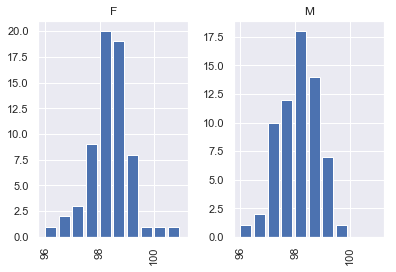

In [65]:

# Show histograms for males and females separately
df['temperature'].hist(by=df['gender'], width=0.4, range=[96, 101])

Thus since our p_value is above 1%, well below the 5% threshold we had decided on, we conclude that there does seem to be a significant difference between men and women in terms of body temperature. What this p-value represents is that if the null hypothesis was true (no difference), then we would only expect to sample such a large difference 1 out of 100 times, based on chance. So we are confident that the observed effect is real.

The null hypothesis - that there is no difference between male and female temperatures - can be rejected

ANSWER 6:
Now since the p-value is 0.023< 0.05 we reject the null hypothesis that there is no difference between the mean body temperature of males and females. Therefore, we go with the alternate hypothesis which states, there is some difference between the mean body temperature of males and females.

Yes, the difference in male and female body temperatures is statistically significant.

Analysis Conclusion:
1) All in all, it appears that the true normal human body temperature varies from 98.6 degrees fahrenheit.

2) Moreover, normal body temperature varies across a gaussian distribution and should only be considered "abnormal" if it varies outside the range of 96.81-99.68.

3) Finally, there's evidence in the data that there is a statistically significant difference between males and females in normal body temperature.